In [28]:
print("Hello World")

Hello World


In [29]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import urllib.request
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [30]:
def load_boston_housing_data():
    
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    
    try:
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        print(f"✅ Raw data loaded successfully. Shape: {raw_df.shape}")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None
    
    # Process data as per original dataset structure
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    
    print(f"✅ Data processing completed. Features shape: {data.shape}, Target shape: {target.shape}")
    
    # Define feature names from original Boston dataset
    feature_names = [
        'CRIM',     # Per capita crime rate by town
        'ZN',       # Proportion of residential land zoned for lots over 25,000 sq.ft.
        'INDUS',    # Proportion of non-retail business acres per town
        'CHAS',     # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        'NOX',      # Nitric oxides concentration (parts per 10 million)
        'RM',       # Average number of rooms per dwelling
        'AGE',      # Proportion of owner-occupied units built prior to 1940
        'DIS',      # Weighted distances to employment centres
        'RAD',      # Index of accessibility to radial highways
        'TAX',      # Full-value property-tax rate per $10,000
        'PTRATIO',  # Pupil-teacher ratio by town
        'B',        # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        'LSTAT'     # % lower status of the population
    ]
    
    # Create comprehensive DataFrame
    df = pd.DataFrame(data, columns=feature_names)
    df['MEDV'] = target  # Median value of owner-occupied homes in $1000s (TARGET)
    
    print(f"✅ Dataset created successfully. Final shape: {df.shape}")
    print(f"✅ Features: {len(feature_names)}, Target: MEDV")
    
    return df

# Load the dataset
df = load_boston_housing_data()

if df is not None:
    print("\n" + "="*60)
    print("DATASET LOADED SUCCESSFULLY!")
    print("="*60)
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
else:
    print("❌ Failed to load dataset. Please check your internet connection.")

✅ Raw data loaded successfully. Shape: (1012, 11)
✅ Data processing completed. Features shape: (506, 13), Target shape: (506,)
✅ Dataset created successfully. Final shape: (506, 14)
✅ Features: 13, Target: MEDV

DATASET LOADED SUCCESSFULLY!
Dataset shape: (506, 14)
Memory usage: 55.47 KB


In [31]:
print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

print("\nRandom 5 rows:")
display(df.sample(5, random_state=42))


First 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



Last 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9



Random 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1


In [32]:
# Comprehensive dataset information
print("COMPREHENSIVE DATASET INFORMATION")
print("="*50)

print("\n1. Basic Info:")
print(f"   - Shape: {df.shape}")
print(f"   - Features: {df.shape[1] - 1} (excluding target)")
print(f"   - Samples: {df.shape[0]}")
print(f"   - Target variable: MEDV")

print("\n2. Data Types:")
display(df.dtypes.to_frame('Data Type'))

print("\n3. Detailed Info:")
df.info()

COMPREHENSIVE DATASET INFORMATION

1. Basic Info:
   - Shape: (506, 14)
   - Features: 13 (excluding target)
   - Samples: 506
   - Target variable: MEDV

2. Data Types:


,Data Type
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64



3. Detailed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [33]:
# Comprehensive statistical summary
print("STATISTICAL SUMMARY")
print("="*30)

stats_summary = df.describe()
display(stats_summary.round(3))

# Additional statistics
print("\nADDITIONAL STATISTICS:")
additional_stats = pd.DataFrame({
    'Skewness': df.skew(),
    'Kurtosis': df.kurtosis(),
    'Variance': df.var(),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})
display(additional_stats.round(3))

STATISTICAL SUMMARY


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000



ADDITIONAL STATISTICS:


,Skewness,Kurtosis,Variance,IQR
CRIM,5.223,37.131,73.987,3.595
ZN,2.226,4.032,543.937,12.500
INDUS,0.295,-1.234,47.064,12.910
CHAS,3.406,9.638,0.065,0.000
NOX,0.729,-0.065,0.013,0.175
RM,0.404,1.892,0.494,0.738
AGE,-0.599,-0.968,792.358,49.050
DIS,1.012,0.488,4.434,3.088
RAD,1.005,-0.867,75.816,20.000
TAX,0.670,-1.142,28404.759,387.000


In [34]:
# Feature explanations with statistics
feature_info = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to employment centres',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s (TARGET)'
}

print("FEATURE DESCRIPTIONS WITH STATISTICS")
print("="*50)

for feature, description in feature_info.items():
    if feature in df.columns:
        mean_val = df[feature].mean()
        std_val = df[feature].std()
        min_val = df[feature].min()
        max_val = df[feature].max()
        
        print(f"\n{feature}:")
        print(f"  Description: {description}")
        print(f"  Range: [{min_val:.3f}, {max_val:.3f}]")
        print(f"  Mean ± Std: {mean_val:.3f} ± {std_val:.3f}")

FEATURE DESCRIPTIONS WITH STATISTICS

CRIM:
  Description: Per capita crime rate by town
  Range: [0.006, 88.976]
  Mean ± Std: 3.614 ± 8.602

ZN:
  Description: Proportion of residential land zoned for lots over 25,000 sq.ft.
  Range: [0.000, 100.000]
  Mean ± Std: 11.364 ± 23.322

INDUS:
  Description: Proportion of non-retail business acres per town
  Range: [0.460, 27.740]
  Mean ± Std: 11.137 ± 6.860

CHAS:
  Description: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  Range: [0.000, 1.000]
  Mean ± Std: 0.069 ± 0.254

NOX:
  Description: Nitric oxides concentration (parts per 10 million)
  Range: [0.385, 0.871]
  Mean ± Std: 0.555 ± 0.116

RM:
  Description: Average number of rooms per dwelling
  Range: [3.561, 8.780]
  Mean ± Std: 6.285 ± 0.703

AGE:
  Description: Proportion of owner-occupied units built prior to 1940
  Range: [2.900, 100.000]
  Mean ± Std: 68.575 ± 28.149

DIS:
  Description: Weighted distances to employment centres
  Range: [1.130, 12.12

In [35]:
## 3. Data Quality Assessment

In [36]:
# Missing values analysis
print("DATA QUALITY ASSESSMENT")
print("="*30)

print("\n1. Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing Count'] > 0]

if missing_data.empty:
    print("   ✅ No missing values found in the dataset!")
else:
    print("   ⚠️ Missing values detected:")
    display(missing_data)

print(f"\n2. Data Completeness: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.2f}%")

DATA QUALITY ASSESSMENT

1. Missing Values Analysis:
   ✅ No missing values found in the dataset!

2. Data Completeness: 100.00%


In [37]:
# Duplicate analysis
print("\n3. Duplicate Analysis:")
duplicates = df.duplicated().sum()
print(f"   Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("   ⚠️ Duplicate rows found:")
    display(df[df.duplicated()])
else:
    print("   ✅ No duplicate rows found!")

# Check for duplicate feature combinations
feature_cols = df.columns[:-1]  # Exclude target
feature_duplicates = df[feature_cols].duplicated().sum()
print(f"   Number of duplicate feature combinations: {feature_duplicates}")


3. Duplicate Analysis:
   Number of duplicate rows: 0
   ✅ No duplicate rows found!
   Number of duplicate feature combinations: 0


In [38]:
# Comprehensive target variable analysis
print("TARGET VARIABLE (MEDV) ANALYSIS")
print("="*40)

target = df['MEDV']

# Basic statistics
print("\n1. Basic Statistics:")
print(f"   Mean: ${target.mean():.2f}k")
print(f"   Median: ${target.median():.2f}k")
print(f"   Standard Deviation: ${target.std():.2f}k")
print(f"   Range: ${target.min():.2f}k - ${target.max():.2f}k")
print(f"   Interquartile Range: ${target.quantile(0.75) - target.quantile(0.25):.2f}k")

# Distribution shape
print(f"\n2. Distribution Shape:")
print(f"   Skewness: {target.skew():.3f}")
print(f"   Kurtosis: {target.kurtosis():.3f}")

if target.skew() > 0.5:
    print("   📊 Distribution is right-skewed (more expensive houses)")
elif target.skew() < -0.5:
    print("   📊 Distribution is left-skewed (more affordable houses)")
else:
    print("   📊 Distribution is approximately symmetric")

# Percentile analysis
print(f"\n3. Percentile Analysis:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = target.quantile(p/100)
    print(f"   {p}th percentile: ${value:.2f}k")

TARGET VARIABLE (MEDV) ANALYSIS

1. Basic Statistics:
   Mean: $22.53k
   Median: $21.20k
   Standard Deviation: $9.20k
   Range: $5.00k - $50.00k
   Interquartile Range: $7.98k

2. Distribution Shape:
   Skewness: 1.108
   Kurtosis: 1.495
   📊 Distribution is right-skewed (more expensive houses)

3. Percentile Analysis:
   10th percentile: $12.75k
   25th percentile: $17.02k
   50th percentile: $21.20k
   75th percentile: $25.00k
   90th percentile: $34.80k
   95th percentile: $43.40k
   99th percentile: $50.00k


CORRELATION ANALYSIS


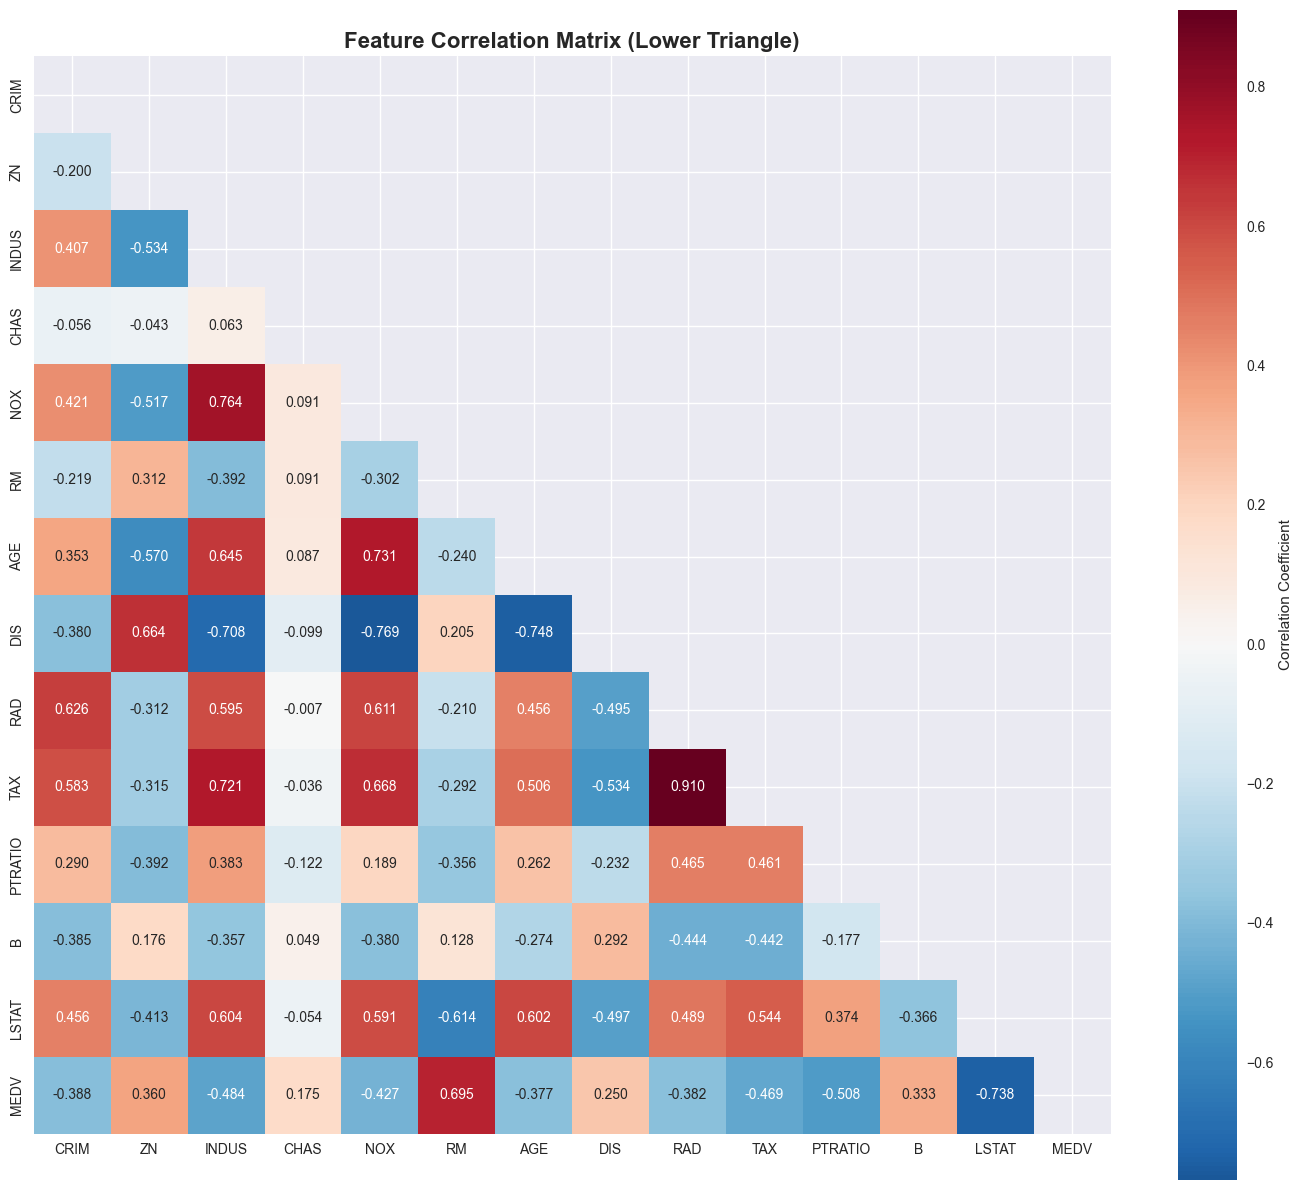


1. Features ranked by absolute correlation with MEDV:
    1. LSTAT   : 0.738 (very strong negative)
    2. RM      : 0.695 (strong positive)
    3. PTRATIO : 0.508 (strong negative)
    4. INDUS   : 0.484 (moderate negative)
    5. TAX     : 0.469 (moderate negative)
    6. NOX     : 0.427 (moderate negative)
    7. CRIM    : 0.388 (moderate negative)
    8. RAD     : 0.382 (moderate negative)
    9. AGE     : 0.377 (moderate negative)
   10. ZN      : 0.360 (moderate positive)
   11. B       : 0.333 (moderate positive)
   12. DIS     : 0.250 (weak positive)
   13. CHAS    : 0.175 (weak positive)

2. Highly correlated feature pairs (|r| > 0.7):
   INDUS ↔ NOX: 0.764
     💡 Consider potential multicollinearity issues
   INDUS ↔ DIS: -0.708
     💡 Consider potential multicollinearity issues
   INDUS ↔ TAX: 0.721
     💡 Consider potential multicollinearity issues
   NOX ↔ AGE: 0.731
     💡 Consider potential multicollinearity issues
   NOX ↔ DIS: -0.769
     💡 Consider potential multicol

In [39]:
# Comprehensive correlation analysis
print("CORRELATION ANALYSIS")
print("="*25)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r',  # Red-Blue colormap (red for negative, blue for positive)
            center=0, 
            fmt='.3f',
            square=True,
            mask=mask,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Target variable correlations
target_correlations = correlation_matrix['MEDV'].drop('MEDV').abs().sort_values(ascending=False)

print("\n1. Features ranked by absolute correlation with MEDV:")
for i, (feature, corr) in enumerate(target_correlations.items(), 1):
    direction = "positive" if correlation_matrix.loc[feature, 'MEDV'] > 0 else "negative"
    strength = "very strong" if corr > 0.7 else "strong" if corr > 0.5 else "moderate" if corr > 0.3 else "weak"
    print(f"   {i:2d}. {feature:8s}: {corr:.3f} ({strength} {direction})")

# Identify highly correlated feature pairs (excluding target)
print("\n2. Highly correlated feature pairs (|r| > 0.7):")
feature_corrs = correlation_matrix.drop('MEDV', axis=0).drop('MEDV', axis=1)
high_corrs = []

for i in range(len(feature_corrs.columns)):
    for j in range(i+1, len(feature_corrs.columns)):
        corr_val = feature_corrs.iloc[i, j]
        if abs(corr_val) > 0.7:
            feature1 = feature_corrs.columns[i]
            feature2 = feature_corrs.columns[j]
            high_corrs.append((feature1, feature2, corr_val))

if high_corrs:
    for feature1, feature2, corr in high_corrs:
        print(f"   {feature1} ↔ {feature2}: {corr:.3f}")
        print(f"     💡 Consider potential multicollinearity issues")
else:
    print("   ✅ No highly correlated feature pairs found (good for linear models)")

In [40]:
# Analyze scaling needs
print("DATA PREPROCESSING RECOMMENDATIONS")
print("="*45)

# Feature scaling analysis
print("\n1. Feature Scaling Analysis:")
feature_ranges = pd.DataFrame({
    'Feature': df.columns[:-1],  # Exclude target
    'Min': [df[col].min() for col in df.columns[:-1]],
    'Max': [df[col].max() for col in df.columns[:-1]],
    'Range': [df[col].max() - df[col].min() for col in df.columns[:-1]],
    'Mean': [df[col].mean() for col in df.columns[:-1]],
    'Std': [df[col].std() for col in df.columns[:-1]]
})

feature_ranges['Scale_Difference'] = feature_ranges['Range'] / feature_ranges['Range'].min()
display(feature_ranges.round(3))

# Scaling recommendation
max_scale_diff = feature_ranges['Scale_Difference'].max()
print(f"\n   Maximum scale difference: {max_scale_diff:.1f}x")

if max_scale_diff > 10:
    print("   🔧 STRONG RECOMMENDATION: Apply feature scaling (StandardScaler or MinMaxScaler)")
    print("      - Features have very different scales")
    print("      - Important for distance-based algorithms and gradient descent")
else:
    print("   ✅ Feature scaling may not be critical, but still recommended for consistency")

# Identify features needing special attention
large_scale_features = feature_ranges[feature_ranges['Scale_Difference'] > 100]['Feature'].tolist()
if large_scale_features:
    print(f"   ⚠️ Features with very large scales: {large_scale_features}")

DATA PREPROCESSING RECOMMENDATIONS

1. Feature Scaling Analysis:


,Feature,Min,Max,Range,Mean,Std,Scale_Difference
0,CRIM,0.006,88.976,88.970,3.614,8.602,183.066
1,ZN,0.000,100.000,100.000,11.364,23.322,205.761
2,INDUS,0.460,27.740,27.280,11.137,6.860,56.132
3,CHAS,0.000,1.000,1.000,0.069,0.254,2.058
4,NOX,0.385,0.871,0.486,0.555,0.116,1.000
5,RM,3.561,8.780,5.219,6.285,0.703,10.739
6,AGE,2.900,100.000,97.100,68.575,28.149,199.794
7,DIS,1.130,12.126,10.997,3.795,2.106,22.627
8,RAD,1.000,24.000,23.000,9.549,8.707,47.325
9,TAX,187.000,711.000,524.000,408.237,168.537,1078.189



   Maximum scale difference: 1078.2x
   🔧 STRONG RECOMMENDATION: Apply feature scaling (StandardScaler or MinMaxScaler)
      - Features have very different scales
      - Important for distance-based algorithms and gradient descent
   ⚠️ Features with very large scales: ['CRIM', 'ZN', 'AGE', 'TAX', 'B']
